In [14]:
%matplotlib inline

In [15]:
from sparapy.radiosity_fast import DRadiosityFast
from sparapy.radiosity import Radiosity
import sparapy.geometry as geo
import sparapy as sp
import cProfile
from datetime import datetime
import numpy as np

sample_walls = [
    geo.Polygon(
        [[0, 0, 0], [1, 0, 0], [1, 0, 1], [0, 0, 1]],
        [1, 0, 0], [0, 1, 0]),
    geo.Polygon(
        [[0, 1, 0], [1, 1, 0], [1, 1, 1], [0, 1, 1]],
        [1, 0, 0], [0, -1, 0]),
    geo.Polygon(
        [[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0]],
        [1, 0, 0], [0, 0, 1]),
    geo.Polygon(
        [[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]],
        [1, 0, 0], [0, 0, -1]),
    geo.Polygon(
        [[0, 0, 0], [0, 0, 1], [0, 1, 1], [0, 1, 0]],
        [0, 0, 1], [1, 0, 0]),
    geo.Polygon(
        [[1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 0]],
        [0, 0, 1], [-1, 0, 0]),
]




In [16]:
DRadiosityFast.from_polygon(sample_walls, 0.01)

In [17]:
cProfile.run('DRadiosityFast.from_polygon(sample_walls, 0.001)')

         63 function calls in 0.984 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.012    0.012    0.983    0.983 <string>:1(<module>)
        6    0.000    0.000    0.000    0.000 geometry.py:141(normal)
        6    0.000    0.000    0.000    0.000 geometry.py:146(size)
        6    0.000    0.000    0.000    0.000 geometry.py:156(center)
        6    0.000    0.000    0.000    0.000 geometry.py:50(calculate_center)
        6    0.000    0.000    0.000    0.000 geometry.py:54(calculate_size)
        1    0.970    0.970    0.970    0.970 radiosity_fast.py:223(process_patches)
        1    0.000    0.000    0.000    0.000 radiosity_fast.py:40(__init__)
        1    0.000    0.000    0.971    0.971 radiosity_fast.py:65(from_polygon)
        1    0.000    0.000    0.000    0.000 radiosity_fast.py:91(<listcomp>)
        1    0.000    0.000    0.000    0.000 radiosity_fast.py:92(<listcomp>)
        1    0.000   

In [18]:
# test for form factor
n_max = 11
fast_first = np.zeros((n_max))
fast_second = np.zeros((n_max))
slow = np.zeros((n_max))
number_of_patches = np.zeros((n_max))
repeat = 5
for i in range(n_max):
    max_size = 1/(2**i)
    print(f'run({i}/{n_max}): {max_size}')
    # run fast two times
    start = datetime.now()
    radiosity = DRadiosityFast.from_polygon(sample_walls, max_size)
    fast_first[i] = (datetime.now() - start).microseconds
    start = datetime.now()
    for _ in range(repeat):
        radiosity = DRadiosityFast.from_polygon(sample_walls, max_size)
    fast_second[i] = (datetime.now() - start).microseconds/repeat
    number_of_patches[i] = radiosity.n_patches
    # Run old
    # if max_size > 0.1:
    start = datetime.now()
    for _ in range(repeat):
        radiosity_old = Radiosity(sample_walls, max_size, 0, 1)
    slow[i] = (datetime.now() - start).microseconds/repeat

run(0/11): 1.0
run(1/11): 0.5
run(2/11): 0.25
run(3/11): 0.125
run(4/11): 0.0625
run(5/11): 0.03125
run(6/11): 0.015625
run(7/11): 0.0078125
run(8/11): 0.00390625
run(9/11): 0.001953125
run(10/11): 0.0009765625


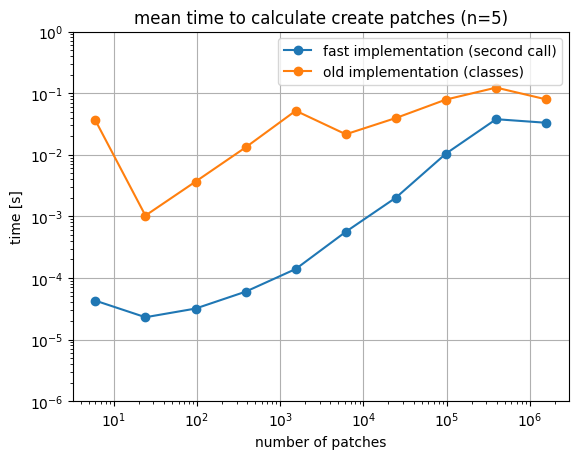

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.gca()
# ax.semilogy(number_of_patches, fast_first*1e-6, label='fast implementation (first call)')
ax.semilogy(number_of_patches, fast_second*1e-6, label='fast implementation (second call)', marker='o')
ax.semilogy(number_of_patches, slow*1e-6, label='old implementation (classes)', marker='o')
ax.grid()
ax.set_xscale('log')
ax.set_xlabel('number of patches')
ax.set_ylabel('time [s]')
ax.set_title(f'mean time to calculate create patches (n={repeat})')
ax.set_ylim(1e-6, 1)
plt.legend()
# note that the old implementation is also using numba code

In [ ]:
# its x times faster for each setting
slow/fast_second

array([847.59345794,  44.70434783, 114.93710692, 219.97993311,
       370.82091691,  38.25008906,  19.6310187 ,   7.53393483,
         3.25815821,   2.39705624])

In [ ]:
fast_second*1e-6

array([4.28000e-05, 2.30000e-05, 3.18000e-05, 5.98000e-05, 1.39600e-04,
       5.61400e-04, 2.01040e-03, 1.04406e-02, 3.77350e-02, 3.30054e-02])